# Homework 2 參考答案

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1-1 Data Preprocess
* 方法 1：字串處理移除千分號
* 方法 2：以 `pandas.read_csv()`，可下參數 thousands 來忽略千分號

In [3]:
import numpy as np
import pandas as pd


### 方法 1：字串處理移除千分號

In [38]:
# 透過字串處理移除千分號
colname = ['year', 'graduates']
df = pd.read_csv('graduates.csv')

# 更改欄位名
df.columns = colname

# 移除千分號
df['graduates'] = df['graduates'].str.replace(',', '')
# 因讀進來的值是字串，因此要轉成數值方便等等做迴歸運算
df['graduates'] = # 更改欄位名
df.columns = colname

df

,year,graduates
0,106學年,241288
1,105學年,233642
2,104學年,250172
3,103學年,272662
4,102學年,277047
5,101學年,277910
6,100學年,279381
7,99學年,282605
8,98學年,278717
9,97學年,277150


### 方法 2：以 `pandas.read_csv()`，可下參數 thousands 來忽略千分號

In [47]:
# 如果直接使用 pandas.read_csv()，可下參數 thousands 來忽略千分號
colname = ['year', 'graduates']
df = pd.read_csv('graduates.csv', thousands=',')

# 更改欄位名
df.columns = colname

# 把學年砍掉
df.year = df['year'].map(lambda x: str(x)[:-2])
df.year = df.year.astype(int)

df

,year,graduates
0,106,241288
1,105,233642
2,104,250172
3,103,272662
4,102,277047
5,101,277910
6,100,279381
7,99,282605
8,98,278717
9,97,277150


In [48]:
# 多加一筆資料
## 方法 1
df = df.append({'year': 96, 'graduates':279320}, ignore_index=True)
## 方法 2
df.loc[10] = [96, 279320]

In [49]:
df

,year,graduates
0,106,241288
1,105,233642
2,104,250172
3,103,272662
4,102,277047
5,101,277910
6,100,279381
7,99,282605
8,98,278717
9,97,277150


## 輸出檔案

In [45]:
df.to_csv('0856029_graduates.csv', index=None)

## 1-2 Polynomial Regression

In [50]:
df['year2'] = df['year'] **2 
df

,year,graduates,year2
0,106,241288,11236
1,105,233642,11025
2,104,250172,10816
3,103,272662,10609
4,102,277047,10404
5,101,277910,10201
6,100,279381,10000
7,99,282605,9801
8,98,278717,9604
9,97,277150,9409


## 2. MEAP93 

In [2]:
import pandas as pd
df=pd.read_csv('MEAP93.csv',sep=',')

In [3]:
df.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.599999,5765,37498,7420,2.9,89.199997,56.400002,67.900002,44918,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.3,11355,101.199997,6601,48722,10370,1.3,91.400002,42.700001,65.300003,59092,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.7,7685,114.000000,6834,44541,7313,3.5,91.400002,43.799999,54.299999,51854,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.4,1148,85.400002,3586,31566,5989,3.6,86.599998,25.299999,60.000000,37555,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.4,1572,96.099998,3847,29781,5545,0.0,100.000000,15.300000,65.800003,35326,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626


### 將 `math10 (y)` 移動到最末端

In [4]:
cols = list(df.columns.values)
cols.pop(cols.index('math10'))

'math10'

In [5]:
df = df[cols + ['math10']]

In [6]:
df.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary,math10
0,1.4,1862,112.599999,5765,37498,7420,2.9,89.199997,67.900002,44918,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043,56.400002
1,2.3,11355,101.199997,6601,48722,10370,1.3,91.400002,65.300003,59092,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886,42.700001
2,2.7,7685,114.000000,6834,44541,7313,3.5,91.400002,54.299999,51854,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165,43.799999
3,3.4,1148,85.400002,3586,31566,5989,3.6,86.599998,60.000000,37555,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836,25.299999
4,3.4,1572,96.099998,3847,29781,5545,0.0,100.000000,65.800003,35326,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626,15.300000


## Standardize

In [7]:
from sklearn.preprocessing import StandardScaler

np_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(np_scaled, columns=df.columns)

In [8]:
df = df_scaled
df.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary,math10
0,-1.750960,-0.297680,0.900259,1.791885,1.137391,0.657640,-0.395452,0.415540,1.496239,1.117489,1.142653,1.789809,0.022733,0.952146,-0.176744,1.152670,3.081187
1,-1.684751,3.226712,0.042033,2.870820,3.367860,2.685756,-0.687511,0.580310,1.288394,3.488616,2.957938,2.627345,2.109921,0.108514,0.222408,2.851557,1.774028
2,-1.655325,1.864180,1.005656,3.171528,2.536998,0.584078,-0.285930,0.580310,0.409048,2.277792,2.093089,2.841893,1.659252,1.049807,-1.075495,2.269434,1.878982
3,-1.603829,-0.562762,-1.147438,-1.020314,-0.041435,-0.326168,-0.267676,0.220812,0.864709,-0.114246,-0.042349,-1.146586,-0.535576,-1.233110,-0.394093,0.035361,0.113841
4,-1.603829,-0.405347,-0.341910,-0.683470,-0.396156,-0.631417,-0.924809,1.224409,1.328364,-0.487129,-0.447340,-0.712057,-0.172712,-0.300168,-0.488444,-0.342311,-0.840290


## 2-1
* 使用 seaborn 套件畫圖 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

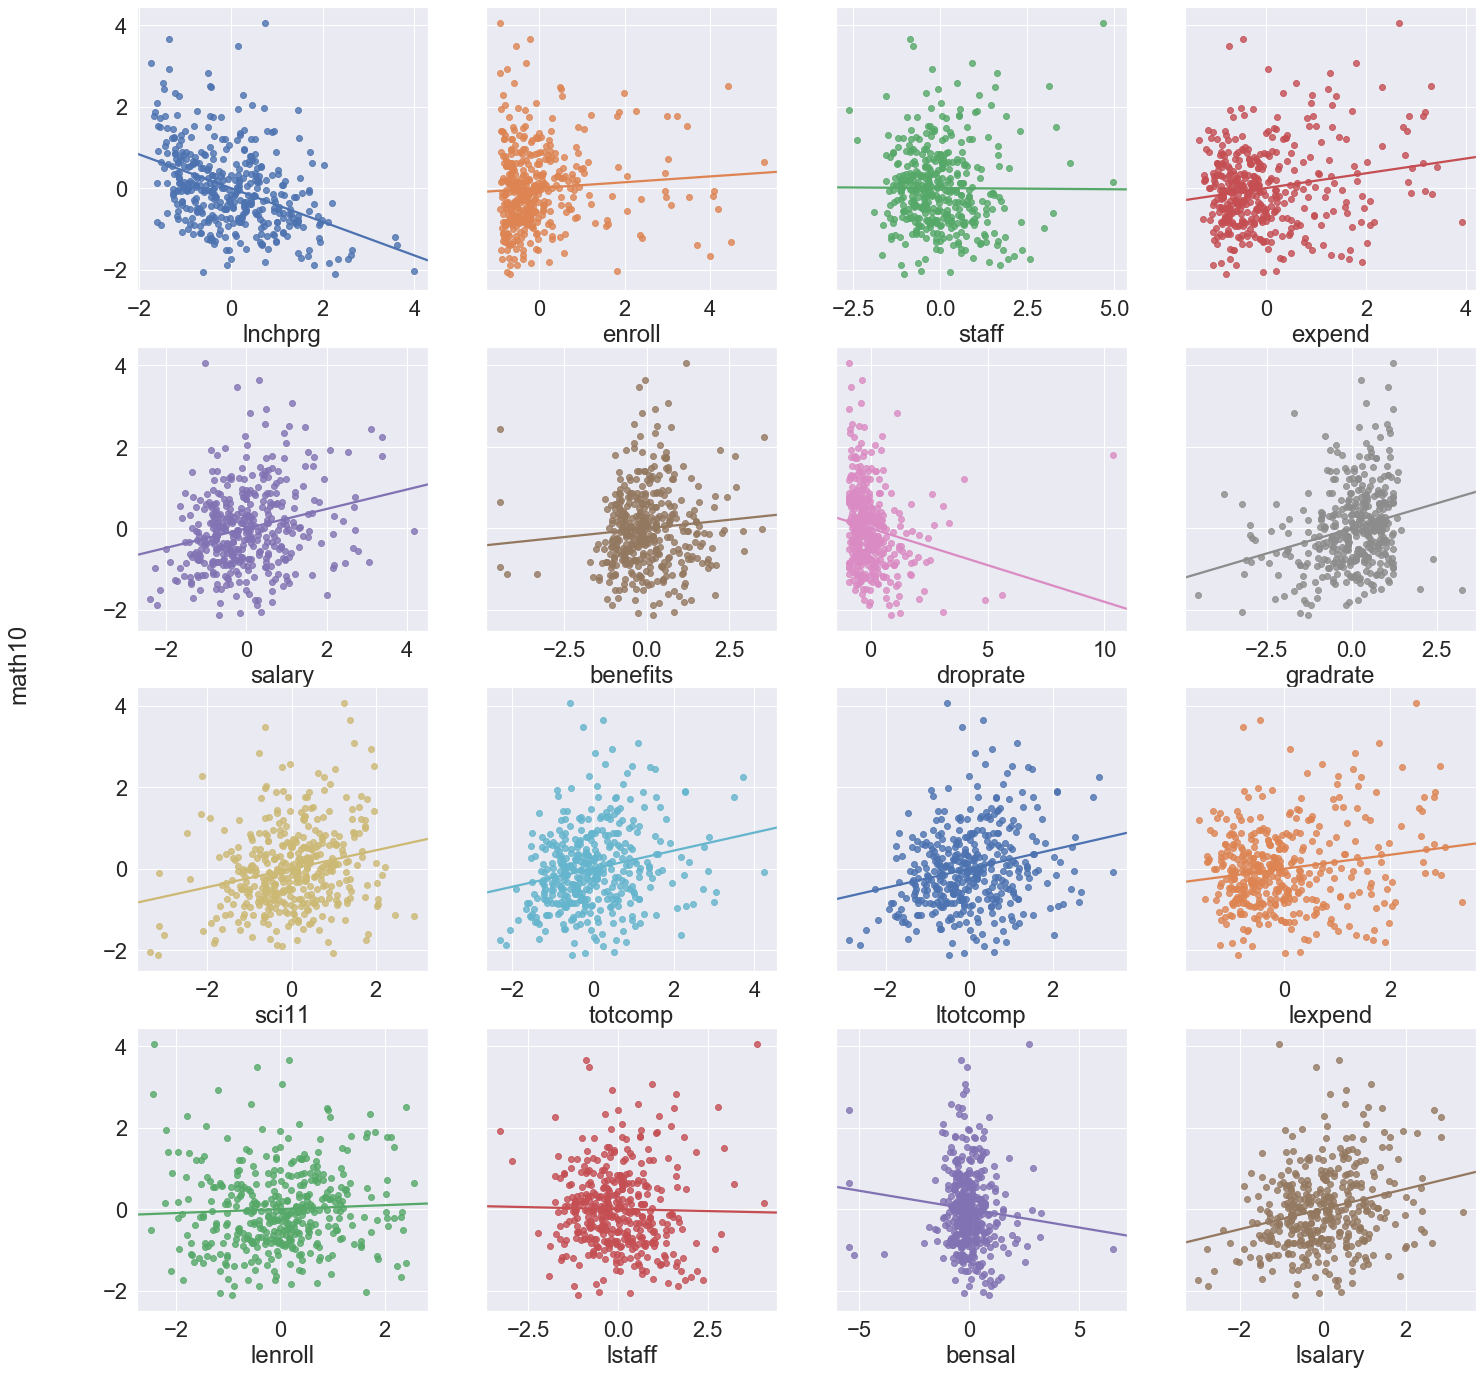

In [10]:
sns.set(font_scale=2)
fig, axes = plt.subplots(4, 4, figsize=(24, 24), sharey=True)
fig.text(0.05, 0.5, 'math10', va='center', rotation='vertical')
#plt.suptitle('16 simple regression')

for i in range(0, 4):
    for j in range(0, 4):
        sns.regplot(x=df_scaled.columns[i*4+j], y=df_scaled.columns[16], data=df_scaled, ax=axes[i][j], ci=None)
        axes[i][j].set_ylabel('')
        #regResult.iloc[i*4+j] = r2_score(y_test, y_pred_lm)

## 2-2 R2-score
* 使用 ridge regression & lasso regression 並搭配 polynomial term

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [12]:
trained_col = [0, 1, 2 ,5, 6, 10]
X, y = df.iloc[:, trained_col], df.iloc[:, 16]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [13]:
X_train.columns

Index(['lnchprg', 'enroll', 'staff', 'benefits', 'droprate', 'ltotcomp'], dtype='object')

In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

row = ['lasso1', 'lasso2', 'lasso3', 'lasso4', 'lasso5']
col = ['test_R2','train_R2']
regResult = pd.DataFrame(index=row, columns=col)

for count, degree in enumerate([1, 2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Lasso(max_iter=100000, alpha=0.1, warm_start=True))
    model.fit(X_train.values, y_train.values)
    y_polyRidge = model.predict(X_test.iloc[:, :len(trained_col)].values)
    regResult.iloc[count] = r2_score(y_test, y_polyRidge), r2_score(y_train, model.predict(X_train.iloc[:, :len(trained_col)]))
regResult

,test_R2,train_R2
lasso1,0.191076,0.1379
lasso2,0.211486,0.20508
lasso3,0.229312,0.249786
lasso4,0.259807,0.320606
lasso5,0.33883,0.338087


In [15]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

row = ['ridge1', 'ridge2', 'ridge3', 'ridge4', 'ridge5']
col = ['test_R2', 'train_R2']
regResult2 = pd.DataFrame(index=row, columns=col)

for count, degree in enumerate([1, 2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(max_iter=100000, alpha=200))
    model.fit(X_train, y_train)
    y_polyRidge = model.predict(X_test.iloc[:, :len(trained_col)])
    regResult2.iloc[count] = r2_score(y_test, y_polyRidge), r2_score(y_train, model.predict(X_train.iloc[:, :len(trained_col)]))
regResult2

,test_R2,train_R2
ridge1,0.208727,0.149924
ridge2,0.237428,0.263277
ridge3,0.263803,0.366406
ridge4,0.23431,0.454911
ridge5,-4.52164,0.527206


* 比較

In [16]:
display(regResult, regResult2)

,test_R2,train_R2
lasso1,0.191076,0.1379
lasso2,0.211486,0.20508
lasso3,0.229312,0.249786
lasso4,0.259807,0.320606
lasso5,0.33883,0.338087


,test_R2,train_R2
ridge1,0.208727,0.149924
ridge2,0.237428,0.263277
ridge3,0.263803,0.366406
ridge4,0.23431,0.454911
ridge5,-4.52164,0.527206


## 3-1